In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
# Load the Breast Cancer Dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9532163742690059

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [4]:
# Visualize the Decision Tree rules
tree_rules = export_text(dt_classifier, feature_names=data.feature_names)
print("\nDecision Tree Rules:\n")
print(tree_rules)



Decision Tree Rules:

|--- mean concave points <= 0.05
|   |--- worst radius <= 16.83
|   |   |--- area error <= 48.70
|   |   |   |--- worst smoothness <= 0.18
|   |   |   |   |--- class: 1
|   |   |   |--- worst smoothness >  0.18
|   |   |   |   |--- class: 0
|   |   |--- area error >  48.70
|   |   |   |--- texture error <= 1.93
|   |   |   |   |--- class: 1
|   |   |   |--- texture error >  1.93
|   |   |   |   |--- class: 0
|   |--- worst radius >  16.83
|   |   |--- worst texture <= 19.91
|   |   |   |--- class: 1
|   |   |--- worst texture >  19.91
|   |   |   |--- worst fractal dimension <= 0.06
|   |   |   |   |--- class: 1
|   |   |   |--- worst fractal dimension >  0.06
|   |   |   |   |--- class: 0
|--- mean concave points >  0.05
|   |--- worst texture <= 20.40
|   |   |--- worst area <= 1012.40
|   |   |   |--- class: 1
|   |   |--- worst area >  1012.40
|   |   |   |--- class: 0
|   |--- worst texture >  20.40
|   |   |--- worst area <= 718.65
|   |   |   |--- worst te

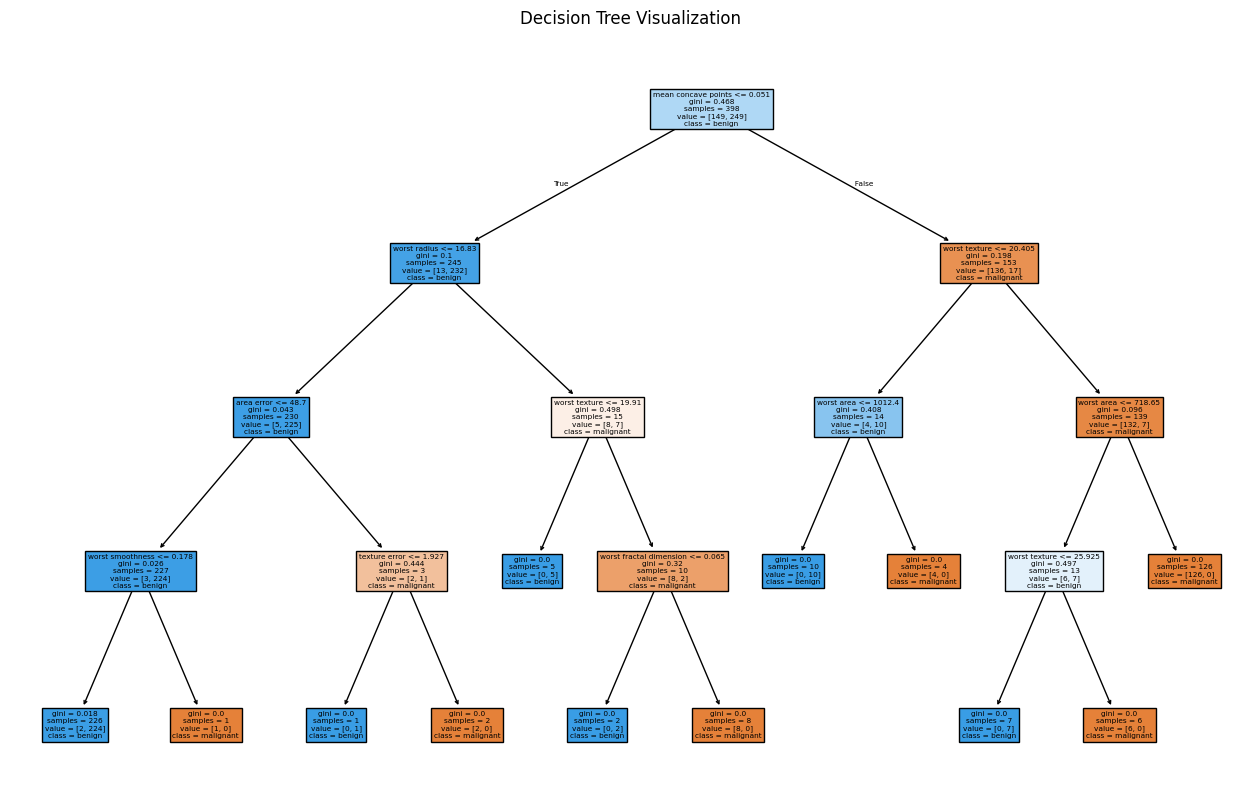

In [5]:
# Plot the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(dt_classifier, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()
